# Chipotle clustering challenge


### Must-have features

- A visualisation of the USA with chipotle locations
- Visualization of the different clusters
- Intrinsic analysis comparison of the clusters of at least 2 methods with varying arguments (using euclidian distance as criteria)
- A chosen centroid to live. Make your argument of why the chosen centroid is superior to others. Examples of arguments are:
    - highest density
    - greatest uninterrupted link of chipotle locations with smallest link-to-link distance
    - ...
- a Github page where results are visualized


### Nice-to-have features

- Colour coded cluster visualisation
- Clear graph legends

## Deliverables
1. Publish your source code on the GitHub repository.
2. Make a clear github page explaining your results and methods
3. A chosen adress for the couple to live

### Steps
1. Create the repository
2. Install geopandas
3. Plot the [US map](https://jcutrer.com/python/learn-geopandas-plotting-usmaps)
4. Visualize your data on this map
5. Plot a [dendogram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html) of your data to help you decide the appropropriate clustering resolution
6. Compare and analyse different [clustering methods](https://scikit-learn.org/stable/modules/clustering.html) using intrinsic analysis to decide on a chosen method.
7. Choose a centroid/adress to live
8. Publish your results to a Github page with an explanation of your method.



# ---------------------------------------------------------------------------------------------------------

In [ ]:
# import all the librairies 

In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step-1 Data analysis

In [2]:
df = pd.read_csv('./Datas/chipotle_stores.csv') 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629 entries, 0 to 2628
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      2629 non-null   object 
 1   location   2629 non-null   object 
 2   address    2629 non-null   object 
 3   latitude   2629 non-null   float64
 4   longitude  2629 non-null   float64
dtypes: float64(2), object(3)
memory usage: 102.8+ KB


In [7]:
df.columns

Index(['state', 'location', 'address', 'latitude', 'longitude'], dtype='object')

In [16]:
# df['state'].value_counts()

In [3]:
state_list = df.state.unique().tolist()
state_list

['Alabama',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'Washington DC',
 'West Virginia',
 'Wisconsin',
 'North Dakota',
 'Wyoming']

In [4]:
# create colors 
import random

def rand_255() -> int:
    """Generate a random number between 0 and 255."""
    return random.randint(0, 255)

# Init the color list
colors = []
colors_v2 = []
for i in state_list:
    colors.append('#%02X%02X%02X' % (rand_255(), rand_255(), rand_255()))
for i in range (0,201):
    colors_v2.append('#%02X%02X%02X' % (rand_255(), rand_255(), rand_255()))
dict_colors = dict(zip(state_list, colors))


df['color'] = [dict_colors[i] for i in df['state']]
    
df        

state          location  \
0          Alabama            Auburn   
1          Alabama        Birmingham   
2          Alabama        Birmingham   
3          Alabama        Birmingham   
4          Alabama           Cullman   
...            ...               ...   
2624     Wisconsin  Pleasant Prairie   
2625     Wisconsin         Wauwatosa   
2626  North Dakota             Fargo   
2627  North Dakota             Fargo   
2628       Wyoming          Cheyenne   

                                             address   latitude   longitude  \
0             346 W Magnolia Ave Auburn, AL 36832 US  32.606813  -85.487328   
1              300 20th St S Birmingham, AL 35233 US  33.509721  -86.802756   
2             3220 Morrow Rd Birmingham, AL 35235 US  33.595581  -86.647437   
3           4719 Highway 280 Birmingham, AL 35242 US  33.422582  -86.698279   
4          1821 Cherokee Ave SW Cullman, AL 35055 US  34.154134  -86.841220   
...                                              ...        ...         ...   
2624  9370 76th St # B Pleasant Prairie, WI 53158 US  42.565892  -87.921048   
2625  2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US  43.067723  -88.048222   
2626              1204 19th Ave N Fargo, ND 58102 US  46.904247  -96.796618   
2627               1680 45th St S Fargo, ND 58103 US  46.855337  -96.861416   
2628      1508 Dell Range Blvd Cheyenne, WY 82009 US  41.160718 -104.805699   

        color  
0     #0D2891  
1     #0D2891  
2     #0D2891  
3     #0D2891  
4     #0D2891  
...       ...  
2624  #CA5074  
2625  #CA5074  
2626  #171DA2  
2627  #171DA2  
2628  #66C093  

[2629 rows x 6 columns]

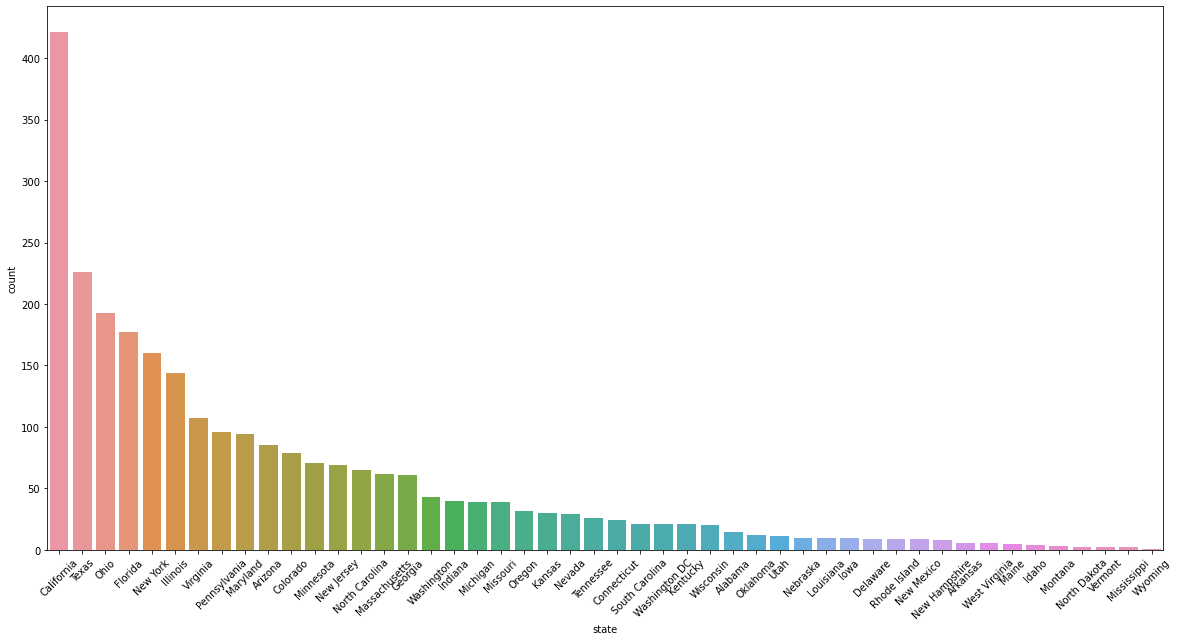

In [5]:
plt.figure(figsize=(20,10))

sns.countplot(x='state', order = df['state'].value_counts().index, data=df)
_ = plt.xticks(rotation=45)

In [6]:
def display_map(dataframe: pd.DataFrame):
    
    # Create a folium map, centered on United States
    m = folium.Map(
        location=[37.6, -95.665],
        zoom_start=4,
        zoom_control=True,
        scrollWheelZoom=False,
        dragging=True
    )
    
    # Add the Chipotle
    _ = dataframe.apply(lambda row: folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=1,
        weight=3,
        color=row['color'],
        fill_color=row['color']
    ).add_to(m), axis=1)
    
    return m

In [7]:
display_map(df)

# Step 2 Cluster

### KMeans

In [8]:
from sklearn.cluster import KMeans

# Create a KMeans object
kmeans = KMeans(n_clusters=45, init='k-means++', random_state=42)

In [9]:
# Cluster the data
kmeans.fit(df[['longitude', 'latitude']])


KMeans(n_clusters=45, random_state=42)

In [10]:
def set_color(index: int) -> str:
    """Return the color corresponding to a given intex"""
    
    return colors_v2[index]

In [11]:
def create_dataframe_with_colors_and_labels(labels, metrics: pd.DataFrame):
    """
    Create and return a new Dataframe of the metrics data,
    with the name of the clusters and the colors.
    """
    
    # Create a dataframe with the labels
    df_labels = pd.DataFrame(labels, columns=['cluster'])
    
    # Add the colors
    df_labels['color'] = df_labels['cluster'].apply(set_color)
    
    # Return a new dataframe with the metrics, the clusters and the colors
    return df[['longitude', 'latitude']].join(df_labels)

In [12]:
# Merge the created labels with the data
df_kmeans = create_dataframe_with_colors_and_labels(kmeans.labels_, df[['longitude', 'latitude']])


In [13]:
display_map(df_kmeans)

### Mean-shift

In [14]:
from sklearn.cluster import MeanShift

x = df[['longitude', 'latitude']]
ms = MeanShift(bandwidth=1.5)
ms.fit(x)

df_ms = create_dataframe_with_colors_and_labels(ms.labels_, x)

In [15]:
display_map(df_ms)

### DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

x = df[['longitude', 'latitude']]
dbsc = DBSCAN(eps=0.3, min_samples=2)
dbsc.fit(x)

df_dbsc = create_dataframe_with_colors_and_labels(dbsc.labels_, x)

In [17]:
display_map(df_dbsc)

### Agglomerative Clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering

x = df[['longitude', 'latitude']]
agg = AgglomerativeClustering(n_clusters=45)
agg.fit(x)

df_agg = create_dataframe_with_colors_and_labels(agg.labels_, x)

In [19]:
display_map(df_agg)

In [20]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

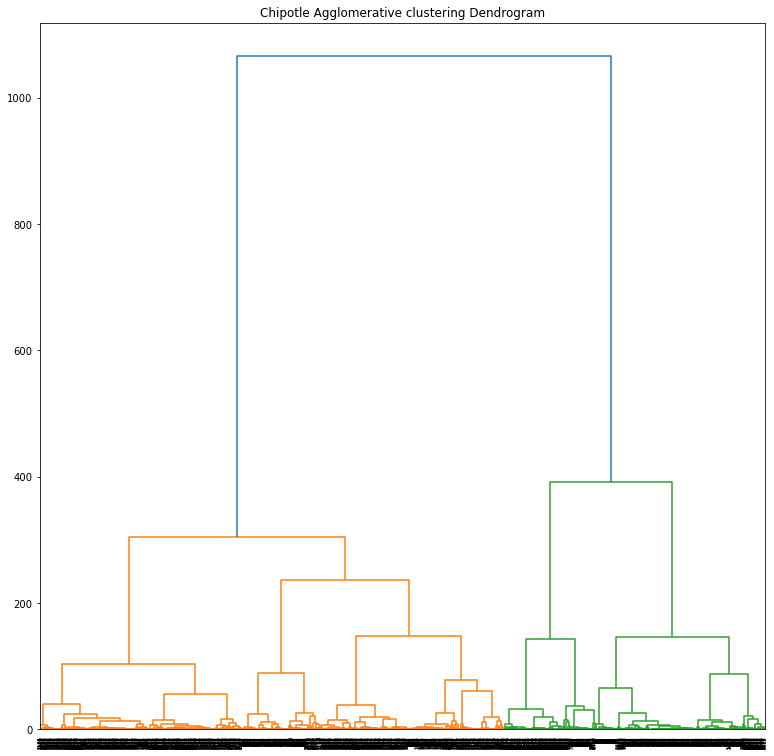

In [21]:
agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg.fit(x)
plt.figure(figsize=(13,13))
plt.title('Chipotle Agglomerative clustering Dendrogram')
plot_dendrogram(agg)
plt.show()